In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

import scipy
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

import scipy.stats as stats
import matplotlib.pyplot as plt
import math

import os

/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
print(os.listdir("../vanessatorres/desktop/kickstarter-projects"))

['.DS_Store', '.ipynb_checkpoints', '.Rapp.history', 'KS', 'ks-projects-201612.csv', 'ks-projects-201801.csv']


In [8]:
df_ks16 = pd.read_csv("../vanessatorres/desktop/kickstarter-projects/ks-projects-201612.csv", encoding='ISO-8859-14')

/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df_ks16.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [10]:
cols = df_ks16.columns.tolist()
for entry in np.arange(0,len(cols),1):
    cols[entry] = cols[entry].rstrip()
df_ks16.columns = cols
df_ks16.columns

df_ks16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 13 columns):
ID               323750 non-null int64
name             323748 non-null object
category         323745 non-null object
main_category    323750 non-null object
currency         323750 non-null object
deadline         323750 non-null object
goal             323750 non-null object
launched         323750 non-null object
pledged          323750 non-null object
state            323750 non-null object
backers          323750 non-null object
country          323750 non-null object
usd pledged      319960 non-null object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


In [11]:
df_ks18 = pd.read_csv("../vanessatorres/desktop/kickstarter-projects/ks-projects-201801.csv", encoding='ISO-8859-14')

In [13]:
df_ks18.drop(['usd_pledged_real', 'usd_goal_real'], axis=1, inplace=True)

In [14]:
df_ks18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 13 columns):
ID               378661 non-null int64
name             378657 non-null object
category         378661 non-null object
main_category    378661 non-null object
currency         378661 non-null object
deadline         378661 non-null object
goal             378661 non-null float64
launched         378661 non-null object
pledged          378661 non-null float64
state            378661 non-null object
backers          378661 non-null int64
country          378661 non-null object
usd pledged      374864 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 37.6+ MB


In [16]:
df_ks = pd.concat([df_ks16, df_ks18])

In [17]:
df_ks[['goal', 'pledged', 'usd pledged', 'backers']] = df_ks[['goal', 'pledged', 'usd pledged', 'backers']].apply(pd.to_numeric, errors='coerce')
df_ks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702411 entries, 0 to 378660
Data columns (total 13 columns):
ID               702411 non-null int64
name             702405 non-null object
category         702406 non-null object
main_category    702411 non-null object
currency         702411 non-null object
deadline         702411 non-null object
goal             701779 non-null float64
launched         702411 non-null object
pledged          701787 non-null float64
state            702411 non-null object
backers          701788 non-null float64
country          702411 non-null object
usd pledged      694201 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 75.0+ MB


In [47]:
df_ks['usd pledged'] = df_ks['usd pledged'].fillna(0)

In [48]:
df_ks['state'].value_counts() < 100
states = ['failed', 'successful', 'live', 'undefined', 'suspended']

In [49]:
df_ks = df_ks[df_ks['state'].isin(states)]

State Percentual in %:
failed        58.69
successful    39.62
live           1.16
suspended      0.53
Name: state, dtype: float64


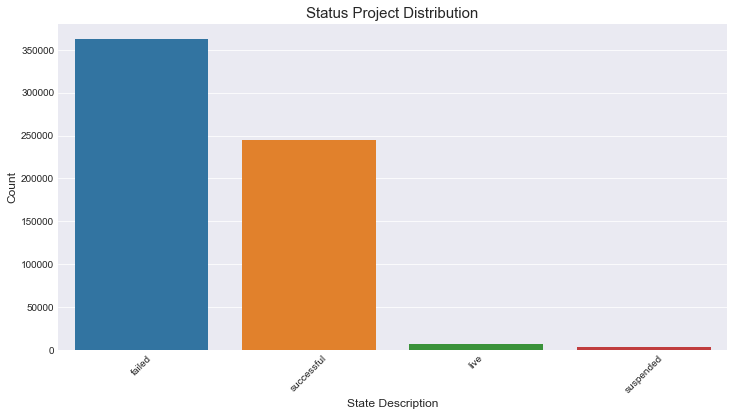

In [50]:
percentual_success = round(df_ks["state"].value_counts() / len(df_ks["state"]) * 100,2)

print("State Percentual in %:")
print(percentual_success)

plt.figure(figsize=(12,6))
sns.countplot(x='state', data=df_ks)

axl = sns.countplot(x="state", data=df_ks)
axl.set_xticklabels(axl.get_xticklabels(),rotation=45)
axl.set_title("Status Project Distribution", fontsize=15)
axl.set_xlabel("State Description", fontsize=12)
axl.set_ylabel("Count", fontsize=12)

plt.show()

In [51]:
df_ks.isnull().sum()

ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
usd pledged      0
dtype: int64

In [52]:
df_ks = df_ks.drop(df_ks[df_ks['name'].isnull() == True].index)

In [53]:
df_ks = df_ks.drop(df_ks[df_ks['goal'].isnull() == True].index)

In [54]:
df_ks = df_ks.drop(df_ks[df_ks['pledged'].isnull() == True].index)

In [55]:
df_ks = df_ks.drop(df_ks[df_ks['backers'].isnull() == True].index)

In [56]:
df_ks.isnull().sum()

ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
usd pledged      0
dtype: int64

In [57]:
df_ks.describe()

,ID,goal,pledged,backers,usd pledged
count,6.169360e+05,6.169360e+05,6.169360e+05,616936.000000,6.169360e+05
mean,1.074400e+09,4.422993e+04,1.007747e+04,114.096157,8.034540e+03
std,6.190220e+08,1.123862e+06,9.779999e+04,975.215361,8.526672e+04
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00
25%,5.378556e+08,2.000000e+03,4.700000e+01,2.000000,2.700000e+01
50%,1.074278e+09,5.000000e+03,7.630000e+02,15.000000,5.595496e+02
75%,1.609944e+09,1.500000e+04,4.525000e+03,62.000000,3.646230e+03
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07


State Percentual in %:
failed        58.69
successful    39.62
live           1.16
suspended      0.53
Name: state, dtype: float64


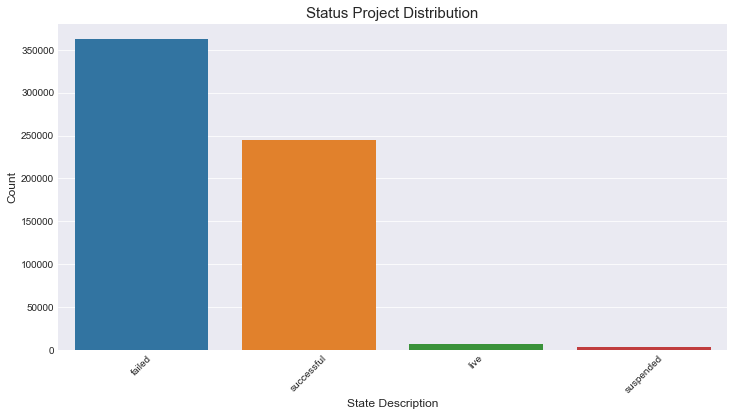

In [58]:
#Nulls removed
percentual_success = round(df_ks["state"].value_counts() / len(df_ks["state"]) * 100,2)

print("State Percentual in %:")
print(percentual_success)

plt.figure(figsize=(12,6))
sns.countplot(x='state', data=df_ks)

axl = sns.countplot(x="state", data=df_ks)
axl.set_xticklabels(axl.get_xticklabels(),rotation=45)
axl.set_title("Status Project Distribution", fontsize=15)
axl.set_xlabel("State Description", fontsize=12)
axl.set_ylabel("Count", fontsize=12)

plt.show()

<function matplotlib.pyplot.tight_layout>

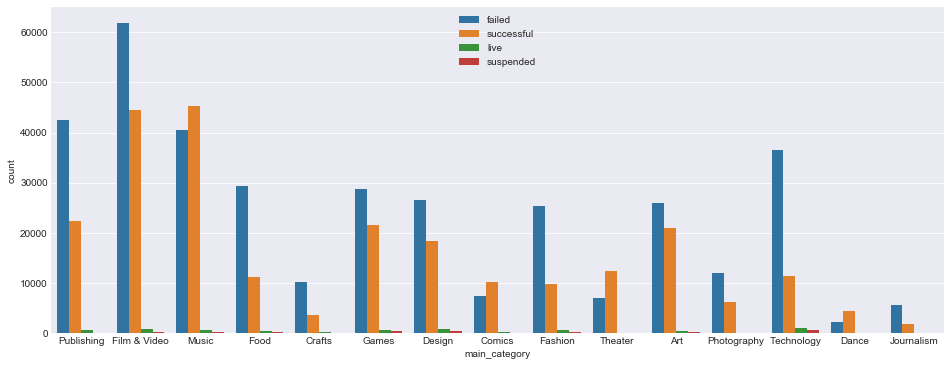

In [59]:
plt.figure(figsize=(16,6))
sns.countplot(x='main_category', data=df_ks, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

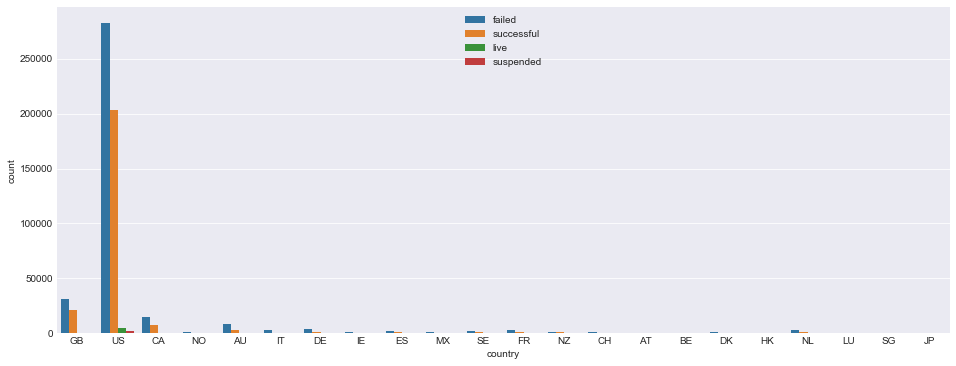

In [60]:
plt.figure(figsize=(16,6))
sns.countplot(x='country', data=df_ks, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

In [61]:
df_ks_lm = ols('goal ~ main_category', data=df_ks).fit()
print(sm.stats.anova_lm(df_ks_lm, type=2))

                     df        sum_sq       mean_sq          F        PR(>F)
main_category      14.0  5.465488e+14  3.903920e+13  30.929282  1.485560e-83
Residual       616921.0  7.786829e+17  1.262208e+12        NaN           NaN


/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [62]:
df_ks_lm = ols('goal ~ country', data=df_ks).fit()
print(sm.stats.anova_lm(df_ks_lm, type=2))

                df        sum_sq       mean_sq          F        PR(>F)
country       21.0  5.264423e+14  2.506868e+13  19.860229  2.893119e-75
Residual  616914.0  7.787030e+17  1.262255e+12        NaN           NaN


/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [63]:
groupby_country = df_ks.groupby('country')
for country, value in groupby_country['goal']:
    print((country, value.mean()))

('AT', 38380.289570552144)
('AU', 73042.00224364302)
('BE', 33015.90202702703)
('CA', 57894.41988681581)
('CH', 301247.82844036695)
('DE', 60644.21552321552)
('DK', 141628.78255602665)
('ES', 47307.51240734773)
('FR', 86152.97439544808)
('GB', 26905.18102005134)
('HK', 187972.08910891088)
('IE', 43790.364478114476)
('IT', 71396.36575481256)
('JP', 1298777.1875)
('LU', 26508.252631578947)
('MX', 257329.2781341108)
('NL', 64567.174370709385)
('NO', 291690.3056894889)
('NZ', 34241.417539267015)
('SE', 306986.33917015605)
('SG', 21172.415254237287)
('US', 40110.518132227386)


In [64]:
groupby_country = df_ks.groupby('main_category')
for country, value in groupby_country['goal']:
    print((country, value.mean()))

('Art', 37447.22000063073)
('Comics', 22241.9599024773)
('Crafts', 11077.036253143337)
('Dance', 8803.813234859674)
('Design', 43189.23427741908)
('Fashion', 24354.45921414102)
('Film & Video', 74558.0921960361)
('Food', 48898.48107700514)
('Games', 42918.250236594584)
('Journalism', 99855.26700488054)
('Music', 14953.97644944571)
('Photography', 11581.00266304348)
('Publishing', 21657.645604587837)
('Technology', 113185.31963549313)
('Theater', 22292.310445948027)


In [65]:
np.random.seed()
countries = ["AT","AU","BE","CA","CH","DE","DK","ES","FR","GB","HK","IE","IT","LU","MX","NL","NO","NZ","SE","SG","US"]

#Generate random data
active_country = np.random.choice(a= countries,
                                  p=[0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048],
                                  size=1000)

active_pledged = stats.poisson.rvs(loc=18,
                                   mu=30,
                                   size=1000)

active_frame = pd.DataFrame({"countries":active_country,"amounts":active_pledged})
groups = active_frame.groupby("countries").groups

#Extract individual countries
AT = active_pledged[groups["AT"]]
AU = active_pledged[groups["AU"]]
BE = active_pledged[groups["BE"]]
CA = active_pledged[groups["CA"]]
CH = active_pledged[groups["CH"]]
DE = active_pledged[groups["DE"]]
DK = active_pledged[groups["DK"]]
ES = active_pledged[groups["ES"]]
FR = active_pledged[groups["FR"]]
GB = active_pledged[groups["GB"]]
HK = active_pledged[groups["HK"]]
IE = active_pledged[groups["IE"]]
IT = active_pledged[groups["IT"]]
LU = active_pledged[groups["LU"]]
MX = active_pledged[groups["MX"]]
NL = active_pledged[groups["NL"]]
NO = active_pledged[groups["NO"]]
NZ = active_pledged[groups["NZ"]]
SE = active_pledged[groups["SE"]]
SG = active_pledged[groups["SG"]]
US = active_pledged[groups["US"]]

#Performing ANOVA
stats.f_oneway(AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,LU,MX,NL,NO,NZ,SE,SG,US)

F_onewayResult(statistic=0.6316386940387213, pvalue=0.89120948386961063)

In [66]:
np.random.seed()
countries = ["AT","AU","BE","CA","CH","DE","DK","ES","FR","GB","HK","IE","IT","LU","MX","NL","NO","NZ","SE","SG","US"]

#Generate random data
active_country = np.random.choice(a= countries,
                                  p=[0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048, 0.048],
                                  size=1000)

#Using a different distribution for US pledges only
USactive_pledged = stats.poisson.rvs(loc=18,
                                   mu=32,
                                   size=1000)

active_pledged = stats.poisson.rvs(loc=18,
                                   mu=30,
                                   size=1000)

active_pledged = np.where(active_country=="US", USactive_pledged, active_pledged)

#Group pledges by countries
active_frame = pd.DataFrame({"countries":active_country,"amounts":active_pledged})
groups = active_frame.groupby("countries").groups

#Extract individual countries
AT = active_pledged[groups["AT"]]
AU = active_pledged[groups["AU"]]
BE = active_pledged[groups["BE"]]
CA = active_pledged[groups["CA"]]
CH = active_pledged[groups["CH"]]
DE = active_pledged[groups["DE"]]
DK = active_pledged[groups["DK"]]
ES = active_pledged[groups["ES"]]
FR = active_pledged[groups["FR"]]
GB = active_pledged[groups["GB"]]
HK = active_pledged[groups["HK"]]
IE = active_pledged[groups["IE"]]
IT = active_pledged[groups["IT"]]
LU = active_pledged[groups["LU"]]
MX = active_pledged[groups["MX"]]
NL = active_pledged[groups["NL"]]
NO = active_pledged[groups["NO"]]
NZ = active_pledged[groups["NZ"]]
SE = active_pledged[groups["SE"]]
SG = active_pledged[groups["SG"]]
US = active_pledged[groups["US"]]

#Performing ANOVA
stats.f_oneway(AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,LU,MX,NL,NO,NZ,SE,SG,US)

F_onewayResult(statistic=1.6463243852338589, pvalue=0.036558718598046762)

In [67]:
#Get all countries' pairs
country_pairs =[]

for country1 in range(19):
    for country2 in range(country1+1,20):
        country_pairs.append((countries[country1], countries[country2]))
        
#T-test on each pair
for country1, country2 in country_pairs:
    print(country1, country2)
    print(stats.ttest_ind(active_pledged[groups[country1]],
                         active_pledged[groups[country2]]))

AT AU
Ttest_indResult(statistic=0.44561760665174949, pvalue=0.65677381539323898)
AT BE
Ttest_indResult(statistic=0.23757774948185248, pvalue=0.81274268686656126)
AT CA
Ttest_indResult(statistic=1.6854095061962828, pvalue=0.095226675822535328)
AT CH
Ttest_indResult(statistic=0.70195358734377422, pvalue=0.48456056886046672)
AT DE
Ttest_indResult(statistic=0.47509870328378417, pvalue=0.6357737751627599)
AT DK
Ttest_indResult(statistic=0.20827393534002664, pvalue=0.83548053084270446)
AT ES
Ttest_indResult(statistic=0.83058077343670322, pvalue=0.40848404832776453)
AT FR
Ttest_indResult(statistic=-0.6504846645290554, pvalue=0.51703636073244996)
AT GB
Ttest_indResult(statistic=-0.49094284151454615, pvalue=0.62461109639019052)
AT HK
Ttest_indResult(statistic=-0.17931800980467688, pvalue=0.85802091457100083)
AT IE
Ttest_indResult(statistic=-1.8924611795865567, pvalue=0.061210307032090377)
AT IT
Ttest_indResult(statistic=0.34369240912271132, pvalue=0.73179207028587323)
AT LU
Ttest_indResult(stat

HK NO
Ttest_indResult(statistic=-1.2233930564480242, pvalue=0.22397276019977555)
HK NZ
Ttest_indResult(statistic=-0.36516917459272774, pvalue=0.71570594764091999)
HK SE
Ttest_indResult(statistic=0.67865457649613092, pvalue=0.49886415209723367)
HK SG
Ttest_indResult(statistic=1.5789791476577799, pvalue=0.11737769191387414)
IE IT
Ttest_indResult(statistic=2.3354346017592333, pvalue=0.021459053123660053)
IE LU
Ttest_indResult(statistic=1.521772588624464, pvalue=0.1308844515077614)
IE MX
Ttest_indResult(statistic=0.58552208078624046, pvalue=0.55947742959945046)
IE NL
Ttest_indResult(statistic=3.0361139131568553, pvalue=0.003048760036136469)
IE NO
Ttest_indResult(statistic=0.42853081033801721, pvalue=0.66920513777869983)
IE NZ
Ttest_indResult(statistic=1.1816895140777142, pvalue=0.24007663264353046)
IE SE
Ttest_indResult(statistic=2.5905111216088295, pvalue=0.011029522776708257)
IE SG
Ttest_indResult(statistic=3.5379220412543679, pvalue=0.00061573992099702736)
IT LU
Ttest_indResult(statisti

group1,group2,meandiff,lower,upper,reject
AT,AU,-0.4376,-4.0197,3.1445,False
AT,BE,-0.2763,-4.1776,3.6251,False
AT,CA,-1.7885,-5.6147,2.0378,False
AT,CH,-0.7621,-4.7487,3.2244,False
AT,DE,-0.4968,-4.2357,3.2421,False
AT,DK,-0.2275,-4.1288,3.6739,False
AT,ES,-0.9506,-4.9681,3.0669,False
AT,FR,0.7115,-3.217,4.64,False
AT,GB,0.5297,-3.2965,4.356,False
AT,HK,0.1776,-3.3754,3.7307,False


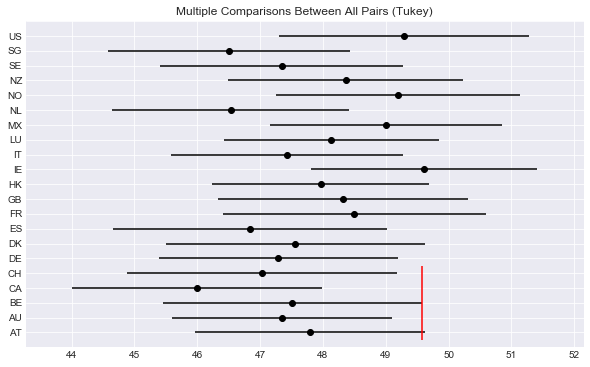

In [68]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=active_pledged,
                         groups=active_country,
                         alpha=0.05)

tukey.plot_simultaneous()
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5,color="red")

tukey.summary()